# **Title of Project**

Servo Prediction Using Linear Regression

-------------

## **Objective**

Main objective is to predic the values of Servo Motor by using the Linear Regression model

## **Data Source**

https://github.com/YBIFoundation/Dataset/blob/main/Servo%20Mechanism.csv

## **Import Library**

In [232]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb

## **Import Data**

In [233]:
dataset = pd.read_csv("Servo Mechanism.csv")

## **Describe Data**

In [234]:
dataset.describe()

,Pgain,Vgain,Class
count,167.000000,167.000000,167.000000
mean,4.155689,2.538922,21.173653
std,1.017770,1.369850,13.908038
min,3.000000,1.000000,1.000000
25%,3.000000,1.000000,10.500000
50%,4.000000,2.000000,18.000000
75%,5.000000,4.000000,33.500000
max,6.000000,5.000000,51.000000


In [235]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Motor   167 non-null    object
 1   Screw   167 non-null    object
 2   Pgain   167 non-null    int64 
 3   Vgain   167 non-null    int64 
 4   Class   167 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 6.7+ KB


In [236]:
dataset[['Motor']].value_counts()

Motor
C        40
A        36
B        36
E        33
D        22
Name: count, dtype: int64

In [237]:
dataset[['Screw']].value_counts()

Screw
A        42
B        35
C        31
D        30
E        29
Name: count, dtype: int64

## **Data Visualization**

In [238]:
dataset.head()

,Motor,Screw,Pgain,Vgain,Class
0,E,E,5,4,4
1,B,D,6,5,11
2,D,D,4,3,6
3,B,A,3,2,48
4,D,B,6,5,6


In [239]:
dataset.tail()

,Motor,Screw,Pgain,Vgain,Class
162,B,C,3,2,44
163,B,E,3,1,40
164,C,D,4,3,25
165,A,B,3,2,44
166,A,A,6,5,20


C:\Users\jaipr\AppData\Local\Temp\ipykernel_6888\2030769664.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(dataset['Class'])


<Axes: xlabel='Class', ylabel='Density'>

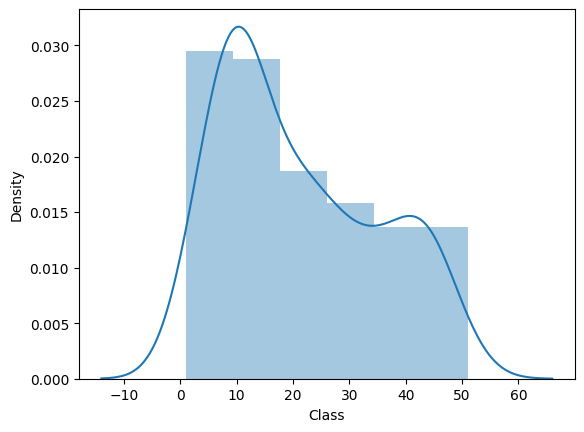

In [241]:
sb.distplot(dataset['Class'])

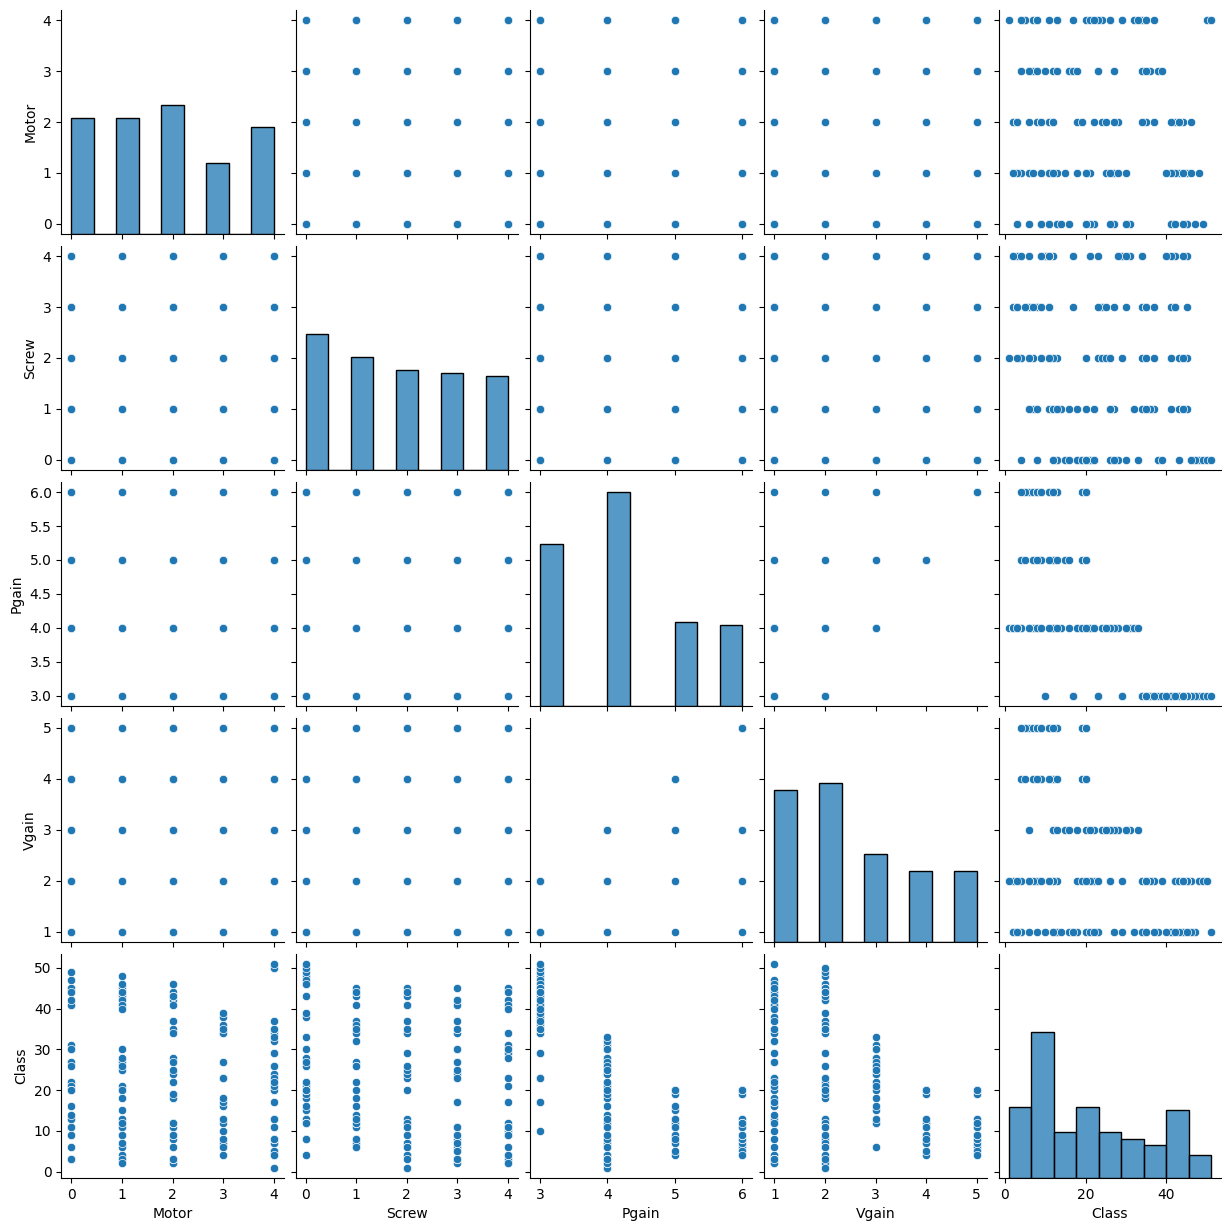

In [250]:
sb.pairplot(dataset)

<Axes: >

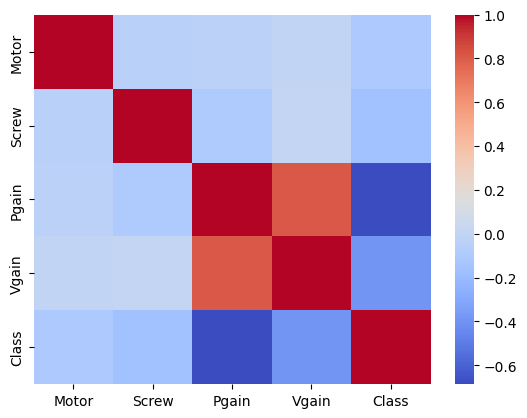

In [251]:
sb.heatmap(dataset.corr(), cmap='coolwarm')

## **Data Preprocessing**

In [242]:
#encoding the categorical features
dataset.replace({'Motor': {'A':0, 'B':1, 'C':2, 'D':3, 'E':4}}, inplace=True)
dataset.replace({'Screw': {'A':0, 'B':1, 'C':2, 'D':3, 'E':4}}, inplace=True)

C:\Users\jaipr\AppData\Local\Temp\ipykernel_6888\1932043422.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset.replace({'Motor': {'A':0, 'B':1, 'C':2, 'D':3, 'E':4}}, inplace=True)
C:\Users\jaipr\AppData\Local\Temp\ipykernel_6888\1932043422.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset.replace({'Screw': {'A':0, 'B':1, 'C':2, 'D':3, 'E':4}}, inplace=True)


<Axes: >

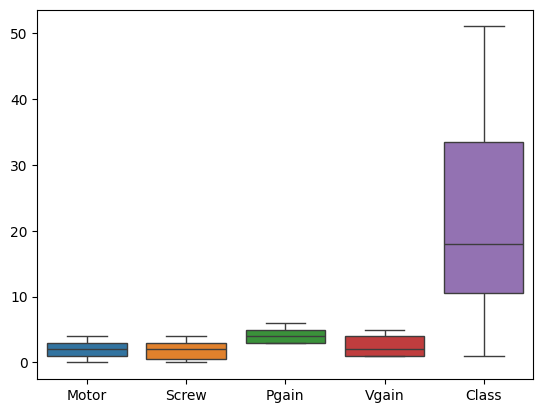

In [243]:
sb.boxplot(dataset)

## **Define Target Variable (y) and Feature Variables (X)**

In [244]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## **Train Test Split**

In [245]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

## **Modeling**

In [246]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

## **Prediction**

In [247]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_test.reshape(len(y_test), 1), y_pred.reshape(len(y_pred), 1)), 1))

[[15.   16.89]
 [ 8.   14.6 ]
 [20.   26.53]
 [36.   36.88]
 [35.   32.11]
 [ 7.   12.25]
 [45.   37.49]
 [29.   27.94]
 [26.   30.23]
 [11.   15.83]
 [13.   19.24]
 [ 7.   16.42]
 [ 3.   13.88]
 [ 2.   15.8 ]
 [33.   27.24]
 [34.   26.03]
 [ 7.   19.97]
 [45.   39.87]
 [11.   15.24]
 [13.    6.79]
 [34.   31.39]
 [43.   40.46]
 [ 2.   12.69]
 [ 5.    9.87]
 [11.   17.03]
 [18.   24.74]
 [20.   22.48]
 [ 6.   20.56]
 [11.    6.8 ]
 [23.   29.  ]
 [41.   32.58]
 [11.   13.45]
 [16.   15.66]
 [11.   14.65]
 [ 3.   18.18]
 [24.   26.06]
 [17.   22.45]
 [44.   38.67]
 [30.   34.41]
 [20.   22.39]
 [25.   23.68]
 [12.   -6.12]
 [25.   27.85]
 [ 9.   12.86]
 [ 5.   -0.36]
 [41.   30.2 ]
 [23.   29.73]
 [ 4.   16.86]
 [50.   37.47]
 [27.   30.83]
 [37.   33.9 ]]


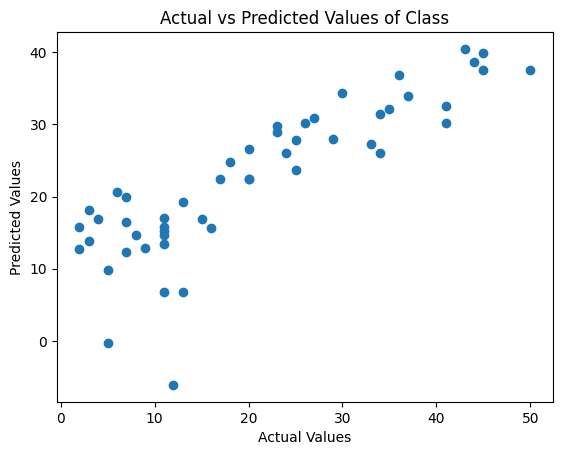

In [248]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values of Class")
plt.show()

## **Model Evaluation**

In [249]:
from sklearn.metrics import mean_absolute_percentage_error, r2_score

print("Mean Absolute Percentage Error = ", mean_absolute_percentage_error(y_test, y_pred), "%")
print("Rsquare = ", r2_score(y_test, y_pred))

Mean Absolute Percentage Error =  0.8462649865876869 %
Rsquare =  0.7009106770516724


## **Explaination**

By using this model, we got the RSquare value of 70.09%